In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stemgraphic as sg
import re
from array import array

In [2]:
# Dataset
df = pd.read_csv('mujeres.csv')

#### Por hacer
- ✅ Crear una funcion para obtener la media de datos agrupados
- Crear una funcion para obtener la moda de datos agrupados
- Crear una funcion para obtener la mediana de datos agrupados
- Crear una funcion para obtener la varianza de datos agrupados
- Crear una funcion para obtener el rango de datos agrupados
- ✅ Crear diagrama de tallos y hojas (¿hacer en excel?)
- ✅ Crear diagrama de puntos 
- Crear tabla de datos agrupados 
- Comparar ambas tablas
- Crear script
- Documento PDF

#### Variables globales

In [27]:
# Rango y numero de elementos
rango = df.max() - df.min()
n = df.shape[0]

# Numero de clases
if n < 30:
    numero_clases = int(np.ceil(np.sqrt(n)))
else:
    numero_clases = int(np.ceil(1 + (3.322 * np.log10(n))))

# Amplitud
amplitud = rango / numero_clases

numero_clases

7

#### Funciones por hacer

In [6]:
# Funcion para obtener la media
def media_agrupada(tabla_frecuencias, n):
    tabla_frecuencias['x_i * f_i'] = tabla_frecuencias['Marca de clase'] * tabla_frecuencias['Frecuencia absoluta']
    sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
    media_agrupada = sum_xifi / n
    return media_agrupada

In [11]:
# Funcion para obtener la moda
def moda_agrupada():
    pass

In [12]:
# Funcion para obtener la mediana
def mediana_agrupada():
    pass

In [7]:
# Funcion para obtener la varianza
def varianza_agrupada(tabla_frecuencias, n, media_agrupada):
    tabla_frecuencias['(x_i - \mu)^2'] = ((tabla_frecuencias['Marca de clase'] - media_agrupada) ** 2)
    tabla_frecuencias['(x_i - \mu)^2 * f_i'] = tabla_frecuencias['(x_i - \mu)^2'] * tabla_frecuencias['Frecuencia absoluta']
    sumatoria = tabla_frecuencias['(x_i - \mu)^2 * f_i'].sum()
    varianza_agrupada = sumatoria / (n - 1)
    return varianza_agrupada

In [14]:
# Funcion para obtener el rango
def rango_agrupado():
    pass

#### Grafica de tallo y hoja

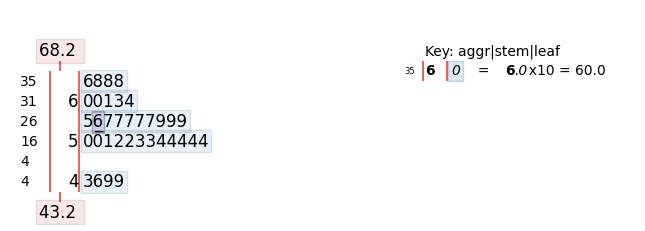

In [30]:
# Genera la grafica de tallo y hoja
# Arreglo con los valores
test_array = df['MUJERES'].to_numpy()
fig, test_array = sg.stem_graphic(test_array)

#### Diagrama de puntos

In [32]:
# Funcion para generar el diagrama de puntos
def dotplot(input_x, **args):

    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts = True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)

    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, s = 10, c = "#000000", **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    # plt.gca().set_xticks(unique_values)

    plt.autoscale(enable=True, axis='x', tight=False)

TypeError: float() argument must be a string or a real number, not 'Axes'

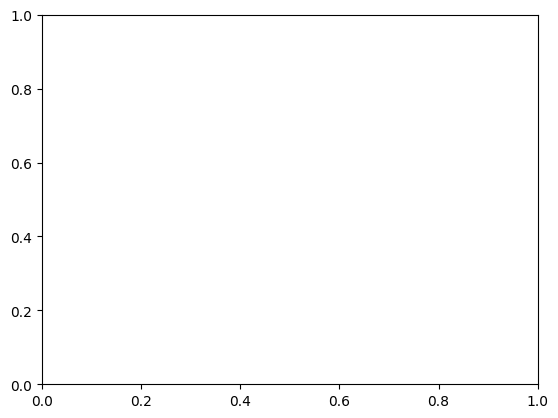

In [33]:
# Genera diagrama
dotplot(input_x = test_array)

#### Tabla de datos agrupados

In [20]:
# Por terminar, marca de clase, f_i * x_i, ..., optimizar codigo
nombre_columna = df.columns[0]
clases = df[nombre_columna].value_counts(bins = numero_clases, sort = False)
tabla_frecuencias = pd.DataFrame(clases)
tabla_frecuencias.rename(columns = {'count':'Frecuencia absoluta'}, inplace = True)
frecuencia_acumulada = []
acumulador = 0

# Columna: frecuencia acumulada
for i in tabla_frecuencias.index:
    acumulador = acumulador + tabla_frecuencias['Frecuencia absoluta'][i]
    frecuencia_acumulada.append(acumulador)

# Columnas: f. acumulada y f. relativa
tabla_frecuencias['Frecuencia acumulada'] = frecuencia_acumulada
tabla_frecuencias['Frecuencia relativa'] = tabla_frecuencias['Frecuencia absoluta'] / n

# Arreglo de intervalos
# "[0-9]+.[0-9]+, [0-9]+.[0-9]+"gm
intervalos_str = []
intervalos_float = []
marca_clase = []

clases_lista = clases.index

for i in clases_lista:
    matched = re.search("[0-9]+.[0-9]+, [0-9]+.[0-9]+", str(i))
    intervalos_str.append(matched.group())
    
for i in intervalos_str:
    intervalos_float.append(i.split(', '))

for i in intervalos_float:
    for j in i:
        j = float(j)

intervalos_float = np.array(intervalos_float, dtype = float)

for i in intervalos_float:
    marca_clase.append(np.sum(i) / 2)

# Columna: marca de clase
tabla_frecuencias['Marca de clase'] = marca_clase

# Columna: x_i * f_i
# tabla_frecuencias['x_i * f_i'] = tabla_frecuencias['Marca de clase'] * tabla_frecuencias['Frecuencia absoluta']

# Columna: (x_i - u)^2
'''
sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
media_agrupada = media_agrupada(sum_xifi, n)
tabla_frecuencias['(x_i - \mu)^2 * f_i'] = ((tabla_frecuencias['Marca de clase'] - media_agrupada) ** 2) * tabla_frecuencias['Frecuencia absoluta']
'''

tabla_frecuencias

,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Marca de clase
MUJERES,,,,
"(43.174, 46.771]",2,2,0.057143,44.9725
"(46.771, 50.343]",4,6,0.114286,48.5570
"(50.343, 53.914]",7,13,0.200000,52.1285
"(53.914, 57.486]",10,23,0.285714,55.7000
"(57.486, 61.057]",5,28,0.142857,59.2715
"(61.057, 64.629]",3,31,0.085714,62.8430
"(64.629, 68.2]",4,35,0.114286,66.4145


#### Funciones test

In [21]:
# Media agrupada
#sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
media_agrupada = media_agrupada(tabla_frecuencias, n)
media_agrupada

55.90334285714286

In [25]:
# Varianza agrupada
varianza_agrupada = varianza_agrupada(tabla_frecuencias, n, media_agrupada)

In [ ]:
tabla_frecuencias['(x_i - \mu)^2'] = ((tabla_frecuencias['Marca de clase'] - media_agrupada) ** 2)
tabla_frecuencias

,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Marca de clase,x_i * f_i,(x_i - \mu)^2 * f_i,(x_i - \mu)^2
MUJERES,,,,,,,
"(43.174, 45.123]",1,1,0.028571,44.1485,44.1485,147.756528,147.756528
"(45.123, 47.046]",1,2,0.028571,46.0845,46.0845,104.438472,104.438472
"(47.046, 48.969]",0,2,0.000000,48.0075,0.0000,68.832149,68.832149
"(48.969, 50.892]",4,6,0.114286,49.9305,199.7220,40.621684,40.621684
"(50.892, 52.815]",5,11,0.142857,51.8535,259.2675,19.807077,19.807077
"(52.815, 54.738]",5,16,0.142857,53.7765,268.8825,6.388328,6.388328
"(54.738, 56.662]",2,18,0.057143,55.7000,111.4000,0.364833,0.364833
"(56.662, 58.585]",5,23,0.142857,57.6235,288.1175,1.741043,1.741043
"(58.585, 60.508]",5,28,0.142857,59.5465,297.7325,10.513714,10.513714


In [26]:
print(df.var(ddof = 0) - varianza_agrupada)
print(df.mean() - media_agrupada)

MUJERES    0.653664
dtype: float64
MUJERES    0.365229
dtype: float64
